## **A. Load thư viện**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

## **B. Phân loại Binary Classification**

> ### **1. Load dữ liệu ung thư, chọn tập train và test, chuẩn hóa dữ liệu**




In [2]:
dataset = datasets.load_breast_cancer(as_frame=True)
X_data = dataset.data
y_data = dataset.target
display(X_data.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
print("Số dữ liệu tập train: %i và tập test: %i" % (X_train.shape[0], X_test.shape[0]))
print("Các class phân loại:", dataset.target_names)

## Chuẩn hóa dữ liệu train và test
ss_train = StandardScaler()
ss_test = StandardScaler()
X_train = ss_train.fit_transform(X_train)
X_test = ss_test.fit_transform(X_test)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Số dữ liệu tập train: 398 và tập test: 171
Các class phân loại: ['malignant' 'benign']


> ### **2. Mô hình Perceptron, Logistic Regression, Support Vector Classification và đánh giá độ chính xác**




Ma trận về tình trạng dự báo các mô hình


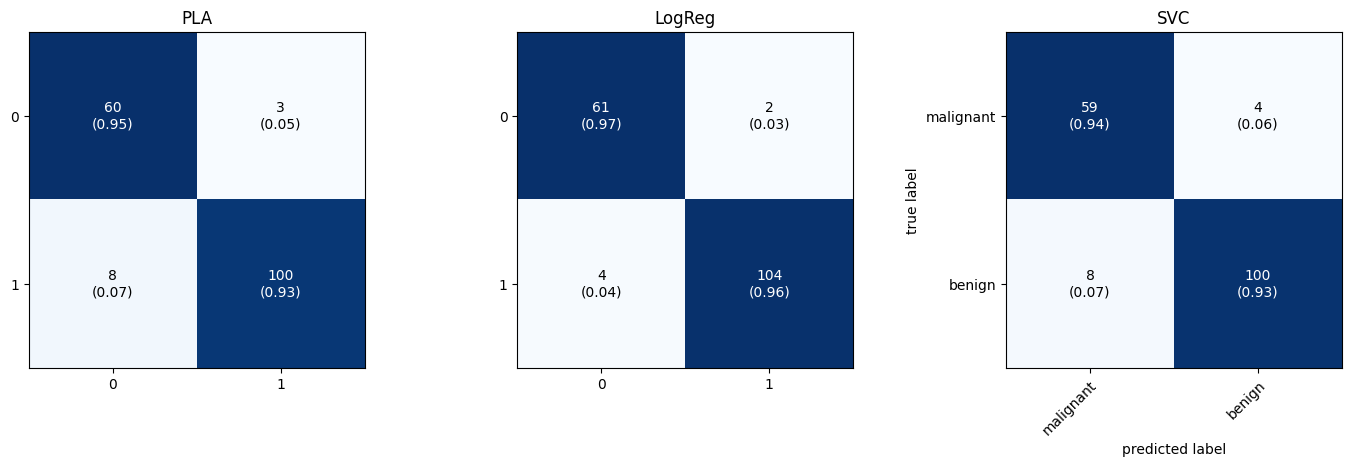

Độ chính xác các mô hình phân loại


,Accuracy,Precision,Recall
PLA,0.935673,0.970874,0.925926
LogReg,0.964912,0.981132,0.962963
SVC,0.929825,0.961538,0.925926


In [3]:
models = {}
models['PLA'] = linear_model.Perceptron()
models['LogReg'] = linear_model.LogisticRegression()
models['SVC'] = svm.LinearSVC()

acc, prec, recall, cf_matrix = {}, {}, {}, {}

for key in models.keys():
    models[key].fit(X_train, y_train)
    y_pred = models[key].predict(X_test)
    acc[key] = accuracy_score(y_test, y_pred)
    prec[key] = precision_score(y_test, y_pred)
    recall[key] = recall_score(y_test, y_pred)
    cf_matrix[key] = confusion_matrix(y_test, y_pred)

print("Ma trận về tình trạng dự báo các mô hình")
fig, axes = plt.subplots(1, 3, figsize=(14,4.5))
for key, ax in zip(cf_matrix.keys(), axes.flatten()):
  plot_confusion_matrix(conf_mat=cf_matrix[key], cmap='Blues', axis = ax, class_names=dataset.target_names, show_normed=True)
  ax.title.set_text(key)
plt.tight_layout()
plt.show()

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = acc.values()
df_model['Precision'] = prec.values()
df_model['Recall'] = recall.values()

print("Độ chính xác các mô hình phân loại")
display(df_model)

> *Nhận xét: Dựa vào bảng confusion matrix và các hệ số accuracy, precision, recall thì mô hình hồi quy Logistic cho dự báo tốt nhất.*

> **Chú ý:**
>>- accuracy: tỷ lệ dự báo đúng tình trạng bệnh (lành tính, ác tính)
>>- precision: tỷ lệ người lành tính trong số người dự báo lành tính (dương thật)
>>- recall: tỷ lệ người dự báo lành tính trong số người lành tính